# Contents

> - Load libraries; prepare data; summarize data
- Cleanup
- Label
- Analysis
- Model


## 0. Data Preparation

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#load data into a dataframe
data_sample = pd.read_csv("https://raw.githubusercontent.com/EQWorks/ws-data-spark/master/data/DataSample.csv")

In [3]:
data_sample.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


## 1. Cleanup

In [4]:
#rename "_ID" to "ID" and " TimeSt" to "TimeSt"
data_sample.rename(columns={'_ID':'ID', ' TimeSt':'TimeSt'}, inplace=True)

In [5]:
#number of rows before removing duplicates
data_sample.count()

ID           22025
TimeSt       22025
Country      22025
Province     22025
City         22025
Latitude     22025
Longitude    22025
dtype: int64

In [6]:
#View all duplicate records (those with identical TimeSt AND geoinfo (Latitude & Longitude)
data_sample[data_sample.duplicated(subset=['TimeSt','Latitude','Longitude'], keep=False)]

,ID,TimeSt,Country,Province,City,Latitude,Longitude
7,4516831,2017-06-21 12:00:00.950,CA,ON,London,43.00910,-81.17650
12,4517047,2017-06-21 12:00:00.950,CA,ON,London,43.00910,-81.17650
17,4517303,2017-06-21 03:00:00.287,CA,ON,Windsor,42.29570,-82.95990
19,4517347,2017-06-21 03:00:00.287,CA,ON,Windsor,42.29570,-82.95990
32,4518000,2017-06-21 08:00:00.663,CA,ON,Kitchener,43.46760,-80.48470
37,4518179,2017-06-21 08:00:00.663,CA,ON,Kitchener,43.46760,-80.48470
54,4519004,2017-06-21 07:00:00.747,CA,ON,Tillsonburg,42.86185,-80.72991
56,4519066,2017-06-21 07:00:00.747,CA,ON,Tillsonburg,42.86185,-80.72991
73,4520085,2017-06-21 17:00:02.433,CA,ON,Windsor,42.26540,-83.02610
77,4520202,2017-06-21 17:00:02.433,CA,ON,Windsor,42.26540,-83.02610


In [7]:
#remove all records duplicate records containing identical timestamp AND geoinfo - NOT keeping the first duplicate instance
data_sample.drop_duplicates(subset=['TimeSt','Latitude','Longitude'], keep=False, inplace=True)

In [8]:
#number of rows remaining after removing duplicates -- 4,052 rows removed
data_sample.count()

ID           17973
TimeSt       17973
Country      17973
Province     17973
City         17973
Latitude     17973
Longitude    17973
dtype: int64

## 2. Label

In [9]:
#create array containing ID and location values of all POIs
poi_data = np.array([['POIID', 'Latitude', 'Longitude'],
               ['POI1', 53.546167, -113.485734],
               ['POI2', 45.521629, -73.566024],
               ['POI3', 45.224830, -63.232729]])

#convert array to dataframe
poi = pd.DataFrame(data=poi_data[1:,1:], index=poi_data[1:,0], columns=poi_data[0,1:])
poi.index.names = ['POIID']

In [10]:
#view POI data
poi

,Latitude,Longitude
POIID,,
POI1,53.546167,-113.485734
POI2,45.521629,-73.566024
POI3,45.22483,-63.232729


### 2.1 DBSCAN Clustering Method

In [11]:
#import DBSCAN clustering algorithm
from sklearn.cluster import DBSCAN

In [12]:
#get a vector array of only Latitude and Longitude columns to feed to the algorithm
geoinfo = data_sample[['Latitude','Longitude']]

In [13]:
#initialize DBSCAN algorithm and feed the point coordinates
clustering = DBSCAN(eps=3, min_samples=3).fit(geoinfo)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
#run the algorithm
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [15]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [23]:
def get_centers(X):
    centers = []
    for index, row in poi.iterrows():
        coords = [row['Latitude'], row['Longitude']]
        centers.append(coords)
    return centers

In [24]:
centers = StandardScaler().fit_transform(get_centers(poi))

In [25]:
centers

array([[ 1.4135147 , -1.38715357],
       [-0.66825867,  0.45513658],
       [-0.74525603,  0.93201699]])

In [27]:
db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [26]:
X = StandardScaler().fit_transform(geoinfo)

In [28]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
import matplotlib.pyplot as plt

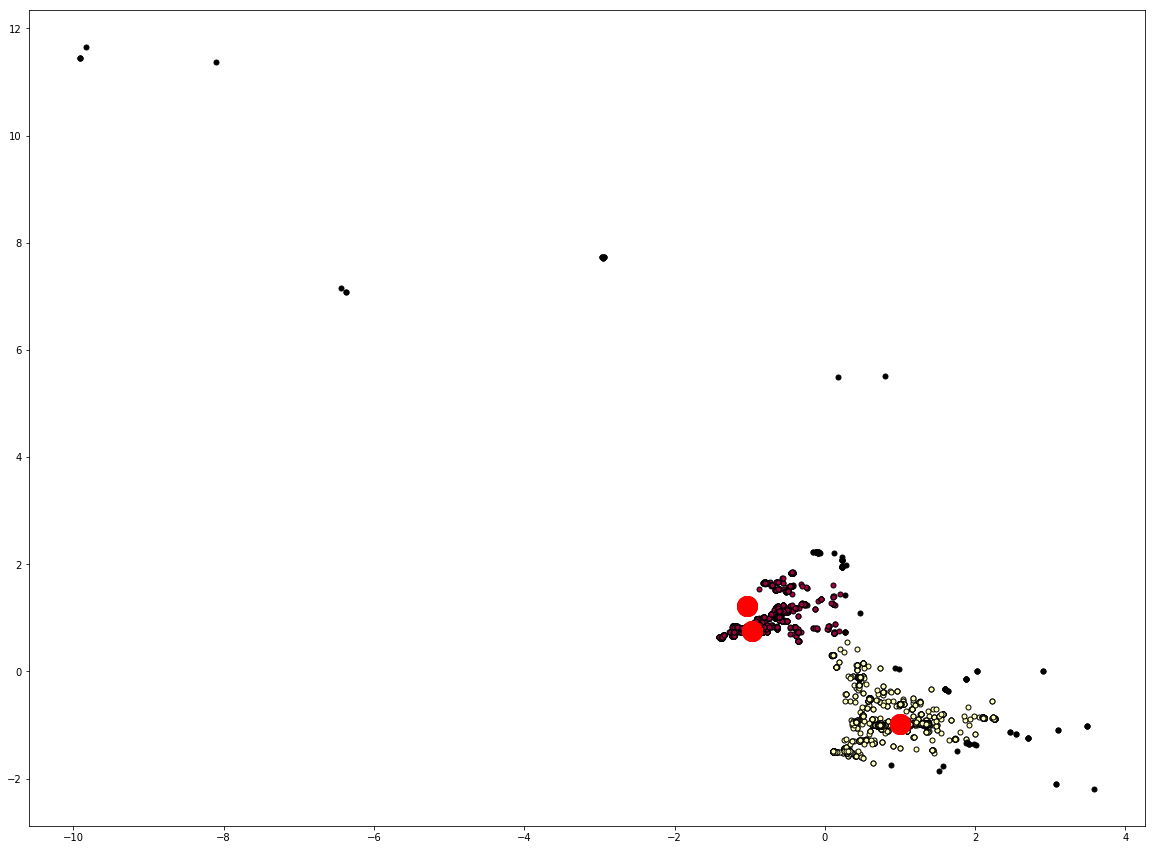

In [30]:
plt.figure(figsize=(20,15))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    plt.plot([0.99967047], [-0.98712124], marker='o', markersize=20, color="red")
    plt.plot([-0.96336759], [0.76088396], marker='o', markersize=20, color="red")
    plt.plot([-1.03597335], [1.21335852], marker='o', markersize=20, color="red")
#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

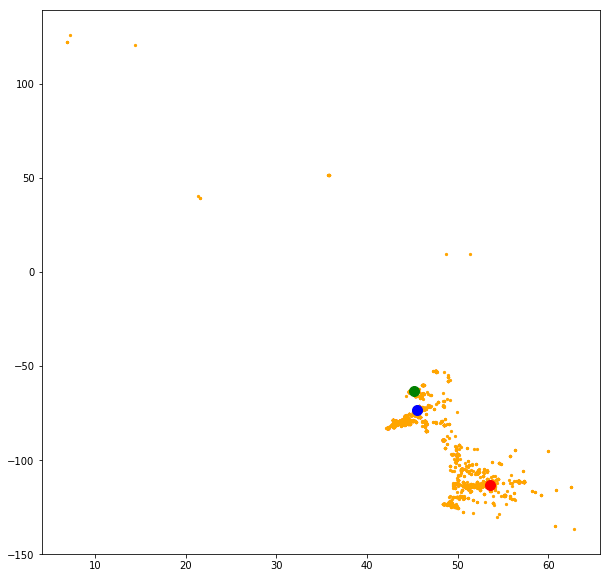

In [31]:
plt.figure(figsize=(10,10))
plt.plot([53.546167], [-113.485734], marker='o', markersize=10, color="red")
plt.plot([45.521629], [-73.566024], marker='o', markersize=10, color="blue")
plt.plot([45.22483], [-63.232729], marker='o', markersize=10, color="green")
plt.scatter(x=geoinfo['Latitude'], y=geoinfo['Longitude'], c='orange', s=5)


## 2.2 K-Means Clustering Method

In [32]:
#import necessary libraries
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans  

In [33]:
#get request coordinates in a separate n x 2 dataframe
geoinfo = data_sample[['Latitude','Longitude']]

In [34]:
#convert request coordinates dataframe to array
geoinfo = np.array(geoinfo)

In [35]:
#create array containing latitude and longitude coordinates of all POIs
#need to scale -- how??
poi_data = np.array([['Latitude', 'Longitude'],
               [53.546167, -113.485734],
               [45.521629, -73.566024],
               [45.224830, -63.232729]])

#convert array to dataframe
poi = pd.DataFrame(data=poi_data)
poi.columns = poi.iloc[0]
poi = poi.reindex(poi.index.drop(0))

In [36]:
poi.reset_index(inplace=True)

In [37]:
poi = poi.drop(columns='index')

In [38]:
poi = poi.apply(pd.to_numeric)

In [39]:
poi.dtypes

0
Latitude     float64
Longitude    float64
dtype: object

In [40]:
#run k-means algorithm on our request coordinates data, set POIs as starting cluster centers
kmeans = KMeans(n_clusters=3, init=np.array(poi), n_init=1, max_iter=1)  
kmeans.fit(geoinfo)

KMeans(algorithm='auto', copy_x=True,
    init=array([[  53.54617, -113.48573],
       [  45.52163,  -73.56602],
       [  45.22483,  -63.23273]]),
    max_iter=1, n_clusters=3, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [41]:
#cluster centers -- not matching originals
print kmeans.cluster_centers_

[[  51.91354876 -113.37807546]
 [  44.23786948  -78.76719289]
 [  45.12419564  -57.22589747]]


In [42]:
#get latitudes and longitudes of the 3 POIs, to plot
poi_lat = [53.546167, 45.521629, 45.224830]
poi_lon = [-113.485734, -73.566024, -63.232729]

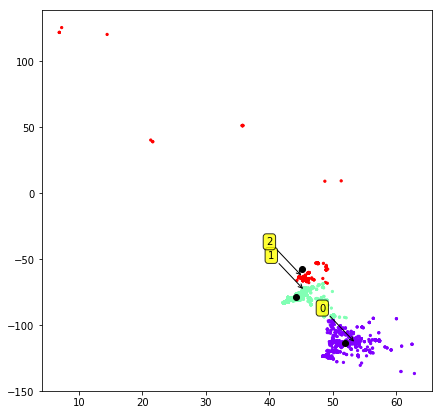

In [43]:
plt.figure(figsize=(7,7))
plt.scatter(geoinfo[:,0], geoinfo[:,1], s=5,c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

for i, txt in enumerate(poi.index):
    plt.annotate(txt, xy=(poi_lat[i], poi_lon[i]),
    xytext=(-30, 30), textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=.8),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [44]:
#make prediction
predict=kmeans.predict(geoinfo)

In [45]:
#add k-means predicted POIs to our dataset
data_sample['POI'] = pd.Series(predict, index=data_sample.index)

In [46]:
data_sample.head()

,ID,TimeSt,Country,Province,City,Latitude,Longitude,POI
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,1
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,1
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,1
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,1
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,1


### Finding the distance of each request to its respective POI

In [50]:
from math import sin, cos, sqrt, atan2, radians

#### Function to calculate Distance between request and POI locations 

In [51]:
#function to calculate distance b/w two locations
def distance(ln1, lt1, ln2, lt2):

    R = 6373.0

    #request coordinates
    lat1 = radians(float(lt1))
    lon1 = radians(float(ln1))

    lat2 = radians(float(lt2))
    lon2 = radians(float(ln2))

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

#### Function that calculates the distance between each request and assigned POI, then inserts distance value into new column

In [54]:
#function that iterates through all requests, calculates distance
def dist_req_poi(dataset, locations):
    for index, row in dataset.iterrows():
        poi_index = row['POI']
        lon = locations['Longitude'][poi_index]
        lat = locations['Latitude'][poi_index]
        dist = distance(row['Longitude'], row['Latitude'], lon, lat)
        dataset['Distance'][index] = dist

In [56]:
#call function to calculate distance for each request
data_sample['Distance'] = 0
dist_req_poi(data_sample, poi)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [57]:
data_sample.head(10)

,ID,TimeSt,Country,Province,City,Latitude,Longitude,POI,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,1,593
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,1,677
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,1,569
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,1,634
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,1,634
5,4516693,2017-06-21 14:00:00.597,CA,ON,Kitchener,43.43810,-80.50990,1,597
6,4516771,2017-06-21 10:00:00.873,CA,ON,Sarnia,42.96100,-82.37300,1,756
8,4516915,2017-06-21 15:00:01.310,CA,ON,London,43.00910,-81.17650,1,667
9,4516953,2017-06-21 16:00:01.700,CA,ON,Kitchener,43.42780,-80.51350,1,598
10,4516966,2017-06-21 01:00:01.787,CA,ON,Kitchener,43.43810,-80.50990,1,597


#### Calculate average distance of each POI to assigned requests

In [58]:
avg_distances = data_sample[['POI', 'Distance']].groupby(data_sample.POI, axis=0, as_index=True).mean()
avg_distances = avg_distances.rename(columns={'Distance':'Mean Dist'})
avg_distances = avg_distances.drop(columns='POI')

In [59]:
avg_distances

,Mean Dist
POI,
0,290.125301
1,454.919488
2,672.829040


In [60]:
std_distances = data_sample[['POI', 'Distance']].groupby(data_sample.POI, axis=0, as_index=True).std()*2
std_distances = std_distances.rename(columns={'Distance':'Std'})
std_distances = std_distances.drop(columns='POI')

In [61]:
std_distances

,Std
POI,
0,554.217699
1,464.378201
2,4176.411028


#### Remove outliers

In [62]:
for index, row in data_sample.iterrows():
    
    #get assigned POI value (0,1,2) to get the right POI Std*3
    i = row['POI']
    if i == -1:
        continue
    if row['Distance'] > std_distances['Std'][i]:
        data_sample['POI'][index] = -1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
data_sample[data_sample['POI'] == -1]

,ID,TimeSt,Country,Province,City,Latitude,Longitude,POI,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,-1,593
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,-1,677
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,-1,569
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,-1,634
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,-1,634
5,4516693,2017-06-21 14:00:00.597,CA,ON,Kitchener,43.43810,-80.50990,-1,597
6,4516771,2017-06-21 10:00:00.873,CA,ON,Sarnia,42.96100,-82.37300,-1,756
8,4516915,2017-06-21 15:00:01.310,CA,ON,London,43.00910,-81.17650,-1,667
9,4516953,2017-06-21 16:00:01.700,CA,ON,Kitchener,43.42780,-80.51350,-1,598
10,4516966,2017-06-21 01:00:01.787,CA,ON,Kitchener,43.43810,-80.50990,-1,597


In [64]:
no_outliers = data_sample[data_sample['POI'] != -1]

In [65]:
import sys
!{sys.executable} -m pip install folium

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [101]:
requests_within_50km = pd.read_csv("C:/Users/Michael/Documents/technical_challenges/EQ_works/requests_within_50km.csv")

In [102]:
requests_within_50km.head()

,lt1,ln1,lt2,ln2,POIID,Distance
0,53.45790,-113.41200,53.546167,-113.485734,POI2,9.084423
1,53.41040,-113.51700,53.546167,-113.485734,POI2,6.954038
2,53.57745,-113.54698,53.546167,-113.485734,POI2,6.952424
3,45.50387,-73.68473,45.521629,-73.566024,POI3,13.215386
4,53.54318,-113.47790,53.546167,-113.485734,POI2,0.881374


In [97]:
poi

,Latitude,Longitude
0,53.546167,-113.485734
1,45.521629,-73.566024
2,45.224830,-63.232729


In [110]:
requests_within_50km.describe()

,lt1,ln1,lt2,ln2,Distance
count,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000
mean,51.264973,-102.260080,51.316061,-102.233987,11.968402
std,3.588972,18.188409,3.601355,18.218092,10.502070
min,44.638500,-113.932400,45.224830,-113.485734,0.316807
25%,45.608900,-113.526350,45.521629,-113.485734,5.294188
50%,53.456700,-113.441000,53.546167,-113.485734,8.807043
75%,53.543313,-73.779800,53.546167,-73.566024,14.882787
max,53.953200,-63.266310,53.546167,-63.232729,49.690033


In [103]:
import folium

In [114]:
# import the library
import folium
import pandas as pd

# Make an empty map
m = folium.Map(location=[47,-90], tiles="Mapbox Bright", zoom_start=4)

# For each POI
radius = 50
min_count = 0
max_count = 0
for i, apoi in poi.iterrows():
    # get list of points in 'radius' circle
    ptDen = data_sample[(data_sample.POI == i) & (data_sample.Distance < radius)]
    
    # Add POI and circle around it on the map
#   radius= max(data_sample.Distance[data_sample['POI'] == i])*1000
    folium.Circle(
        location=[apoi['Latitude'], apoi['Longitude']], 
        popup="POI " + str(i),
        radius=str(radius*1000),
        color='crimson', fill=True, fill_color='crimson'
    ).add_to(m)
    
    # Calculate point count parameters
    pt_count = len(ptDen)
    if min_count > pt_count:
        min_count = pt_count
    if max_count < pt_count:
        max_count = pt_count
    
    # Draw at most 100 points
    k = 0
    for j, pt in ptDen.iterrows():
        folium.Marker(location=(pt['Latitude'], pt['Longitude'])).add_to(m)
        k = k + 1
        if k > 100:
            break

# Calculate densities            
pt_span = max_count - min_count
for i, apoi in poi.iterrows():
    ptDen = data_sample[(data_sample.POI == i) & (data_sample.Distance < radius)]
    pt_count = len(ptDen)
    density = -10 + 20*(pt_count - min_count)/pt_span
    print  "POI", i, ", Points : ", pt_count, ", Density : ", density
            
# show map
m

POI 0 , Points :  2540 , Density :  10
POI 1 , Points :  957 , Density :  -3
POI 2 , Points :  9 , Density :  -10


In [112]:
requests_within_50km.groupby('POIID').count()

,lt1,ln1,lt2,ln2,Distance
POIID,,,,,
POI2,2599,2599,2599,2599,2599
POI3,933,933,933,933,933
POI4,64,64,64,64,64
